In [1]:
import torch as th
import numpy as np
from ipynb.fs.full.methods import dichotomy, fib, golden
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

dich shorter:  0.16996699669967
0.08583333333333334 0.3121071643186969 0.505
Win 1 2 2
dich shorter:  0.466996699669967
dich shorter:  0.4293286219081272
dich shorter:  0.33539094650205764
fib shorter: 0.6153846153846154
fib shorter: 0.625
fib shorter: 0.6153846153846154
fib shorter: 0.609375
0.03395833333333334 0.04553582159348448 0.07283653846153847
Win 3 6 6
dich shorter:  0.4966996699669967
dich shorter:  0.49335548172757476
dich shorter:  0.48653198653198654
dich shorter:  0.47231833910034604
dich shorter:  0.4413919413919414
dich shorter:  0.3672199170124481
fib shorter: 0.6180555555555556
fib shorter: 0.6179775280898876
fib shorter: 0.6180555555555556
fib shorter: 0.6181037747759122
fib shorter: 0.6177250445632798
fib shorter: 0.6189694663372229
fib shorter: 0.6154623154623154
fib shorter: 0.6249210958212347
fib shorter: 0.6000757575757576
0.004609375000000001 0.004105962471670588 0.00650245949074074
Win 6 11 11
dich shorter:  0.4996699669966997
dich shorter:  0.4993394980184940

In [18]:
def gradient_descent(f, eps_grad, optimizer, max_iters=10000, dims=1):
    print(f'----- GradientDescent with optimizer {optimizer.__class__.__name__} -----')
    np.random.seed(123123)
    x = th.tensor(np.random.rand(dims)).requires_grad_(True)
    iters = 0
    trace = []
    while (x.grad is None or th.max(th.abs(x.grad)) > eps_grad) and iters < max_iters:
        if x.grad is not None:
            x.grad.data.zero_()
        y = f(x)
        trace += [x.data.numpy()]
        y.backward()
        def g(lmbd):
            return f(x.data - lmbd * x.grad.data)
        step = optimizer(g)
        x.data = x.data - step * x.grad.data
        iters += 1

    print(f'Num iters: {iters}')
#     print(f'x = {x.detach().numpy()}')
    print(f'value = {y}')
    return np.array(trace), iters

In [3]:
class ConstOptimizer:
    def __init__(self, x):
        self.x = x
        
    def __call__(self):
        return self.x

In [4]:
class DivisionOptimizer:
    def __init__(self, x, mx):
        self.x = x
        self.mx = mx
        
    def __call__(self):
        self.x /= 2
        self.x = max(self.x, self.mx)
        return self.x * 2

In [5]:
class GoldenOptimizer:
    def __init__(self, l, r):
        self.l = l
        self.r = r
        
    def __call__(self, f):
        return golden(f, self.l, self.r, [], True, 10 ** (-9))[0]

In [231]:
def my_sin(x):
    if isinstance(x, th.Tensor):
        return th.sin(x)
    return np.sin(x)

In [6]:
COLOR_RED = np.linspace(240, 166, 256) / 255.
COLOR_GREEN = np.linspace(244, 188, 256) / 255.
COLOR_BLUE = np.linspace(246, 203, 256) / 255.

def plotLevels(func, xrange, yrange):
    levels = [0, 0.25, 1, 4, 9, 16, 25]

    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = float(func(th.Tensor([X[i, j], Y[i, j]]).double()))

    colors = np.vstack([COLOR_RED, COLOR_GREEN, COLOR_BLUE]).T
    my_cmap = ListedColormap(colors)

    _ = plt.contourf(X, Y, Z, levels=levels, cmap=my_cmap)
    CS = plt.contour(X, Y, Z, levels=levels, colors='#ABBECC')
    plt.clabel(CS, inline=1, fontsize=8, colors='#AAAEBB')
    plt.grid()

[28.0]

In [7]:
def plotTrace(trace):
    x_values, y_values = zip(*trace)
    plt.plot(x_values, y_values, '-o', linewidth=1.0, ms=5.0,
             alpha=1.0, c='C2', label="Trajectory")

In [8]:
def process_f(f, optimizer, dims=2):
    xs, _ = gradient_descent(f, 10 ** (-5), optimizer, dims=dims)
    plotLevels(f, [xs[:, 0].min() - 0.3, xs[:, 0].max() + 0.3], [xs[:, 1].min() - 0.3, xs[:, 1].max() + 0.3])
    plotTrace(xs)
    plt.show()

----- GradientDescent with optimizer ConstOptimizer -----
Num iters: 327
value = 6.192307692320021


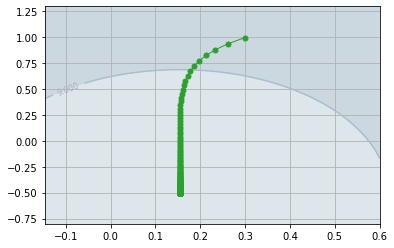

----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 154
value = 6.192307692319105


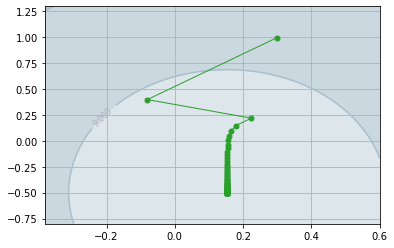

In [17]:
def f(x):
    return th.dot(th.Tensor([13, 2]).double(), x ** 2) - \
        th.dot(th.Tensor([4., -2.]).double(), x) + 7
process_f(f, ConstOptimizer(0.01))
process_f(f, DivisionOptimizer(0.1, 0.01))

----- GradientDescent with optimizer GoldenOptimizer -----
Num iters: 39
value = 6.192307692314895


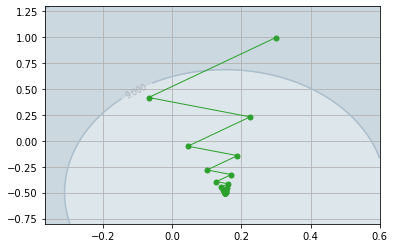

In [20]:
process_f(f, GoldenOptimizer(0, 1.01))

----- GradientDescent with optimizer ConstOptimizer -----
Num iters: 209
x = [ 6.666651   -0.83333333]
value = 4.583333863232937


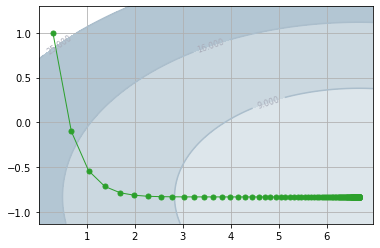

----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 203
x = [ 6.66665161 -0.83333333]
value = 4.583333863226699


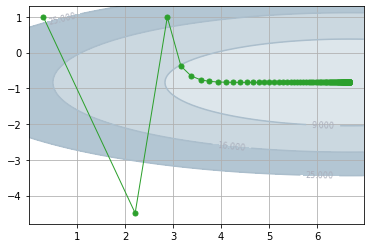

In [30]:
def f(x):
    return th.dot(th.Tensor([0.3, 3]).double(), x ** 2) - \
        th.dot(th.Tensor([4, -5.]).double(), x) + 20
process_f(f, ConstOptimizer(0.1))
process_f(f, DivisionOptimizer(0.5, 0.05))

----- GradientDescent with optimizer ConstOptimizer -----
Num iters: 164
x = [-0.62499893 -0.69999995]
value = -0.012499999994620481


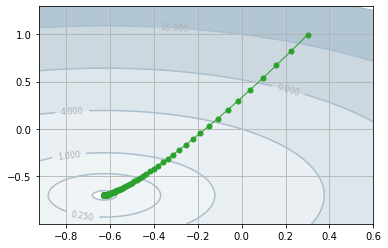

----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 5
x = [-0.625 -0.7  ]
value = -0.012500000000001066


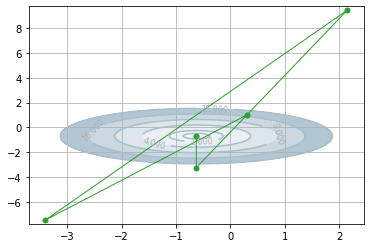

In [31]:
def f(x):
    return th.dot(th.Tensor([4, 5]).double(), x ** 2) - \
        th.dot(th.Tensor([-5, -7]).double(), x) + 4
process_f(f, ConstOptimizer(0.01))
process_f(f, DivisionOptimizer(0.5, 0.05))

----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 10000
value = -1.6676994754408323
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 3956
value = -1346.4641425915713
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 10000
value = -999.854872256836
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 928
value = -13519.211476961236
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 701
value = -34264.25672664648
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 2103
value = -56040.8032036024
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 779
value = -16575.454953958288
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 2351
value = -70141.8371279419
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 713
value = -141857.92164781384
----- GradientDescent with optimizer DivisionOptimizer -----
Num

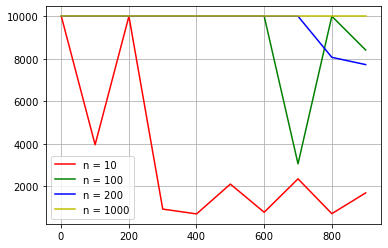

In [15]:
class randFunc:
    def __init__(self, cond, sz):
        self.cond = cond
        self.sz = sz
        v = th.Tensor(np.random.uniform(low=0, high=cond, size=sz))
        v.data[-1] = cond
        v.data[0] = 1
        self.A = th.diag(v)
        self.b = th.Tensor(np.random.uniform(low=0, high=cond, size=sz))
    
    def __call__(self, x):
        return th.dot(th.squeeze(th.mm(self.A.double(), th.unsqueeze(x, 1)), 1), x) - th.dot(self.b.double(), x)

    
def part4():
    dims = [[10,'r'], [100, 'g'], [200, 'b'], [1000, 'y']]
    conditionings = range(1, 1000, 100)
    for sz in dims:
        ans = []
        for cond in conditionings:
            _, iters = gradient_descent(randFunc(cond, sz[0]), 10 ** (-5), DivisionOptimizer(0.5, 0.0001), dims=sz[0])
            ans.append(iters)
        plt.plot(conditionings, ans, color=sz[1], label='n = {}'.format(sz[0]))
    plt.legend()
    plt.grid()

part4()